<a href="https://colab.research.google.com/github/vikasdo/BikeHub/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler


In [2]:
!wget https://raw.githubusercontent.com/vikasdo/BikeHub/refs/heads/main/day.csv

--2024-11-26 15:46:21--  https://raw.githubusercontent.com/vikasdo/BikeHub/refs/heads/main/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57542 (56K) [text/plain]
Saving to: ‘day.csv’

day.csv             100%[===================>]  56.19K  --.-KB/s    in 0.02s   

2024-11-26 15:46:21 (2.50 MB/s) - ‘day.csv’ saved [57542/57542]



In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Preprocessing (1)
* Check features and Drop Invalid Columns
* Check missing values
* Check data types

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Rename Columns
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [6]:
# Drop casual, registered  and instant from df

df = df.drop(['casual', 'registered','instant'], axis=1)
df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
df.isnull().sum()
df.isna().sum()

,0
dteday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


#### Convert The columns datatypes to Appropriate format

In [8]:
# convert dteday column to date datattyoe and extract day value to a new column and drop dteday

# Convert 'dteday' to datetime objects
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')  # Specifying the correct format

# Extract day value to a new column
df['day'] = df['dteday'].dt.day

# Drop 'dteday' column
df = df.drop('dteday', axis=1)

In [9]:

# Define a mapping for weathersit
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light',
    4: 'Heavy'
}

# Define a mapping for season
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Convert 'weathersit' to string using the mapping
df['weathersit'] = df['weathersit'].map(weather_mapping)

# Convert 'season' to string using the mapping
df['season'] = df['season'].map(season_mapping)

# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [10]:
df.dtypes

,0
season,object
year,int64
month,object
holiday,int64
weekday,object
workingday,int64
weathersit,object
temp,float64
atemp,float64
humidity,float64


### Dataset summary
Coun, mean, std, min, max of each feature

In [11]:
df.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,15.720548
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,8.802278
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,1.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,8.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,16.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,23.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,31.000000


# Numerical analysis

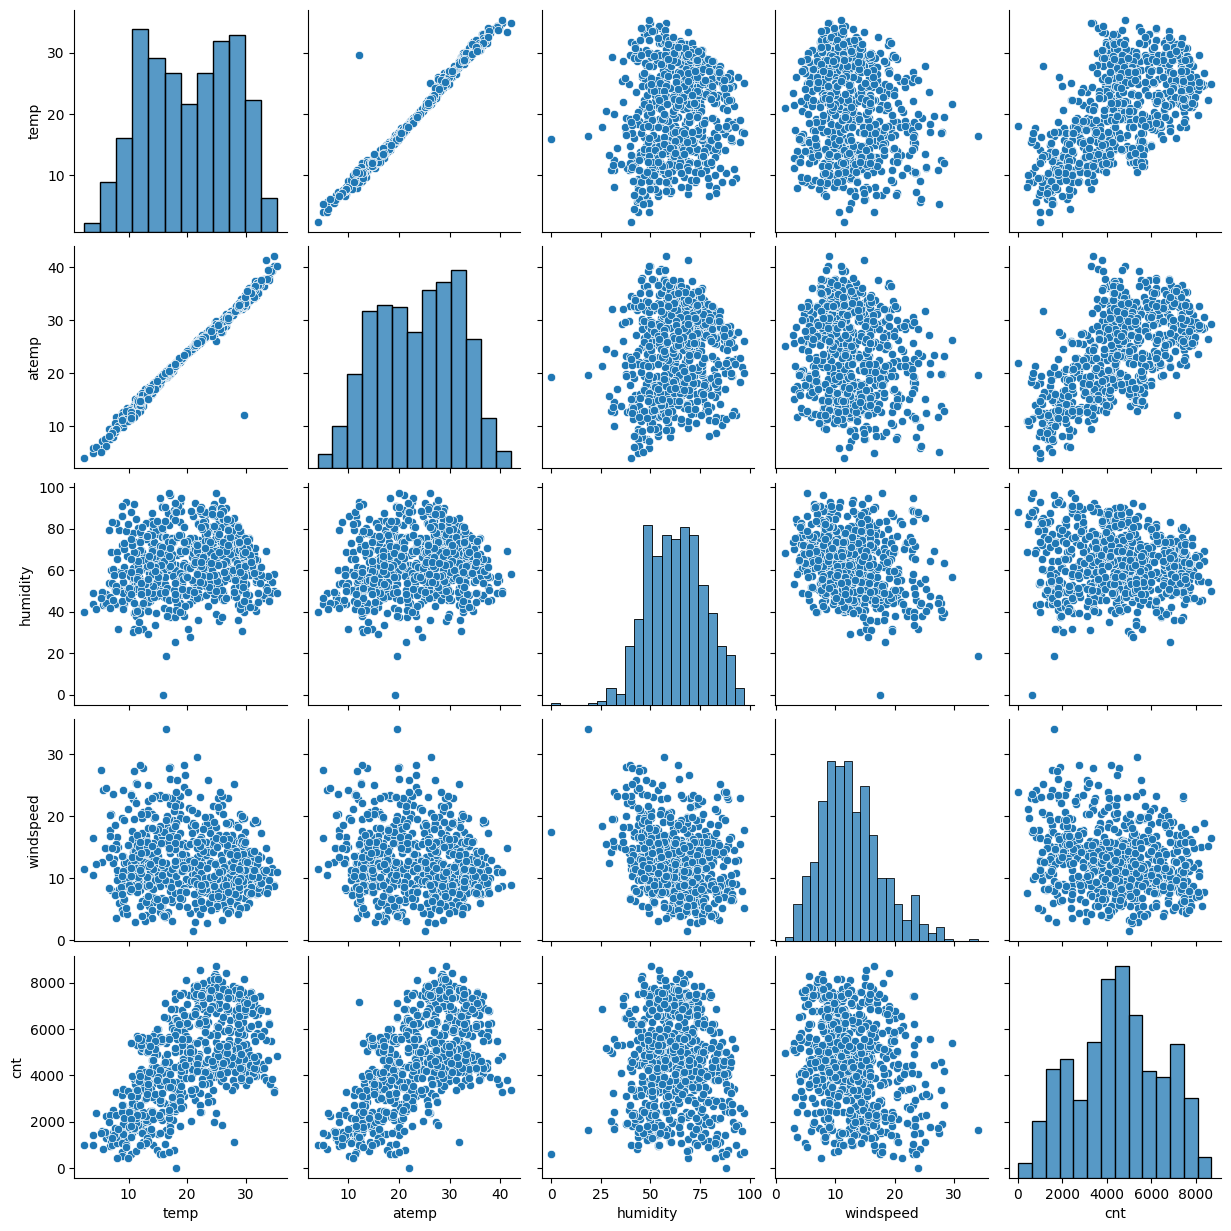

In [12]:
Numerical_col = ['temp','atemp','humidity','windspeed','cnt']
sns.pairplot(data=df[Numerical_col])


In [13]:
df[Numerical_col].corr()

,temp,atemp,humidity,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


# Inferences

Temperature and Apparent Temperature: Both seem to be significant predictors of bike rentals. Including them in a model could improve its accuracy.

### Categorical columns

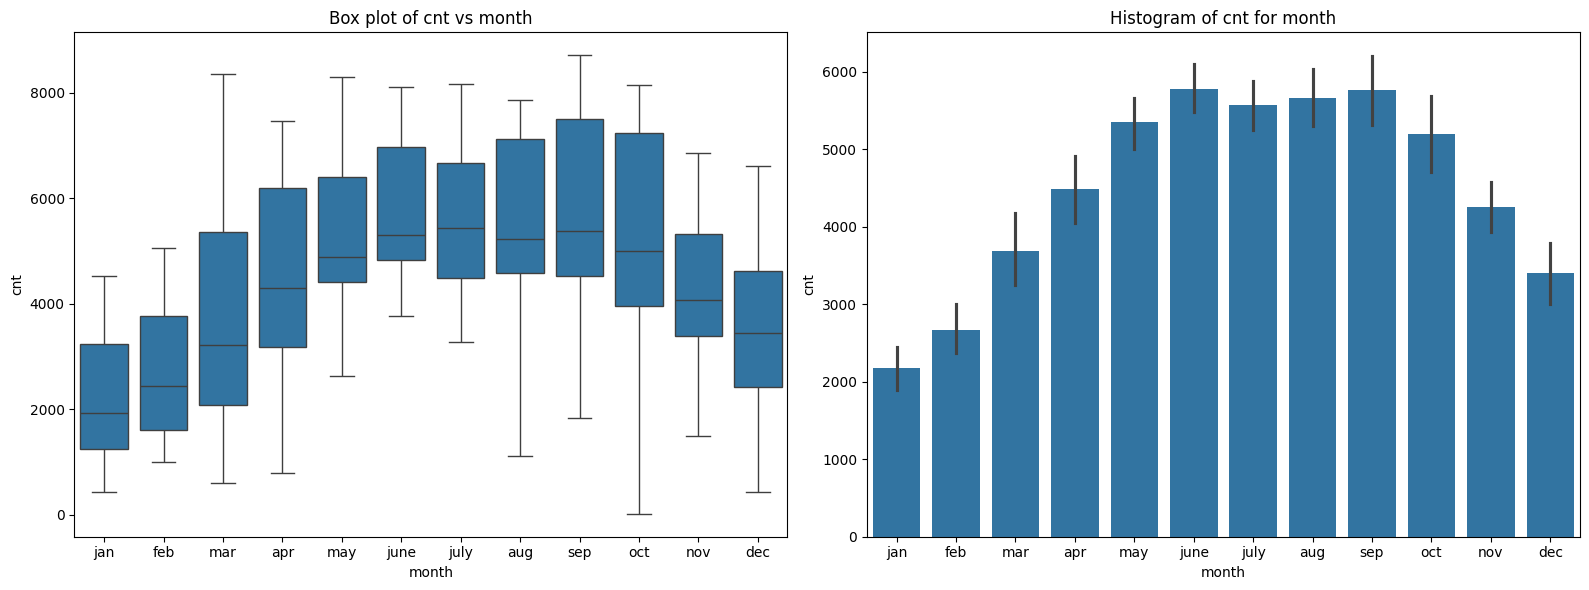

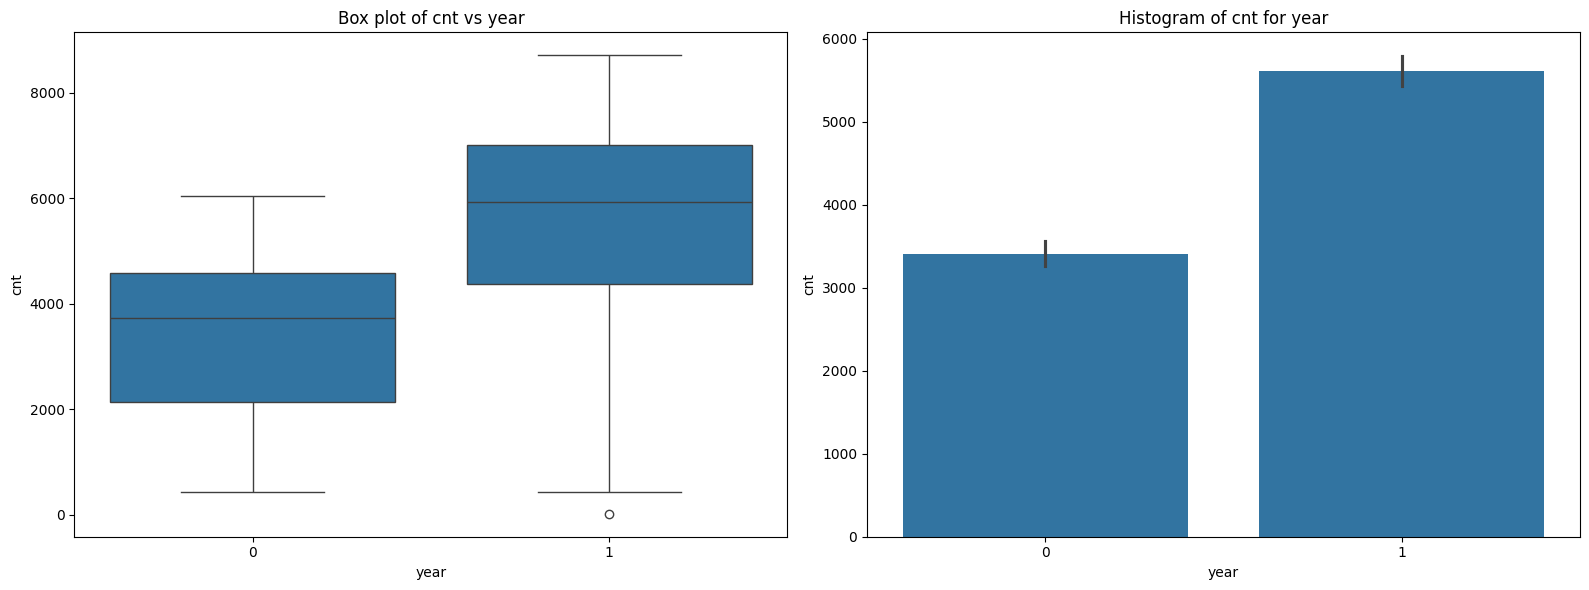

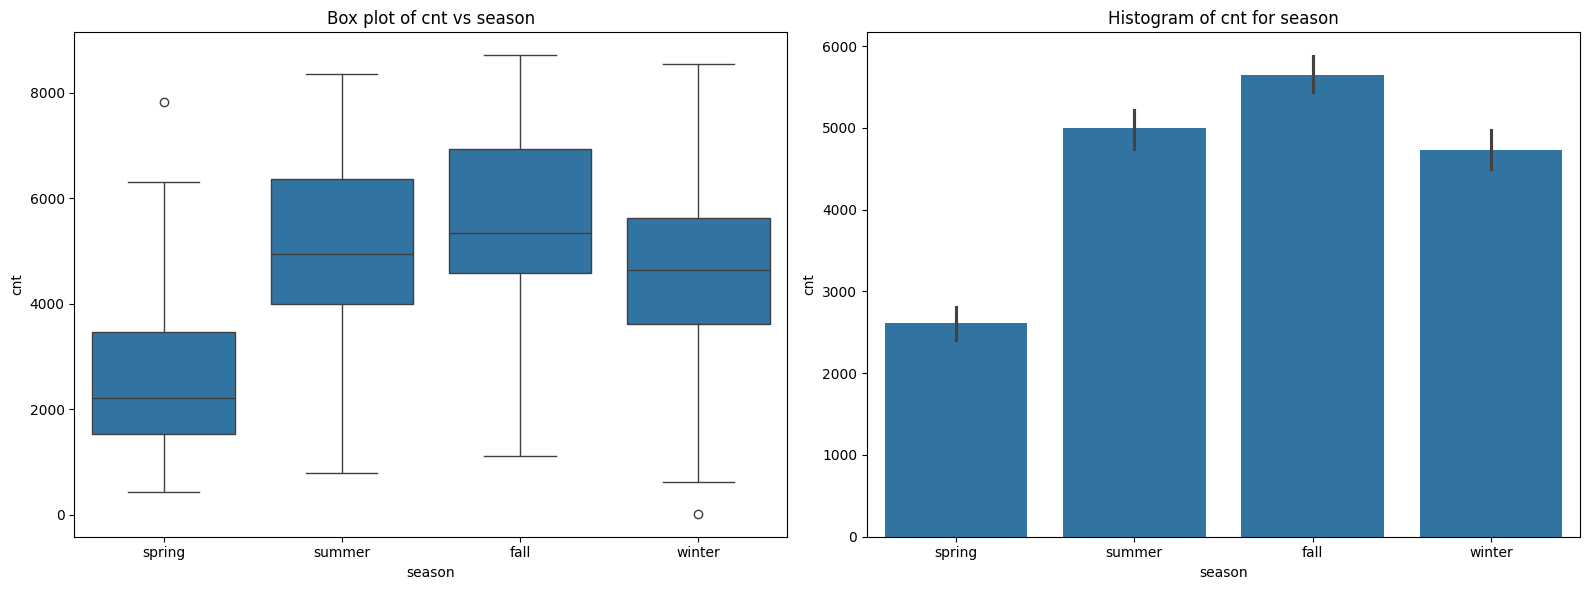

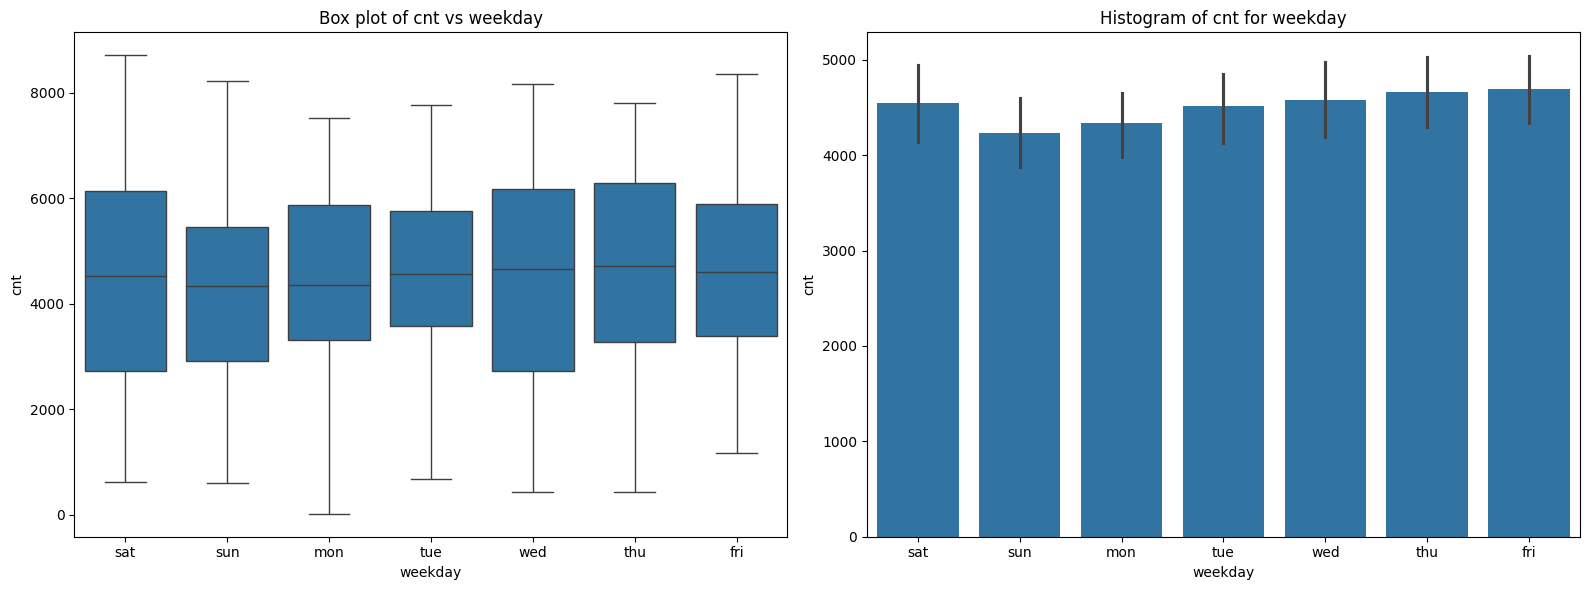

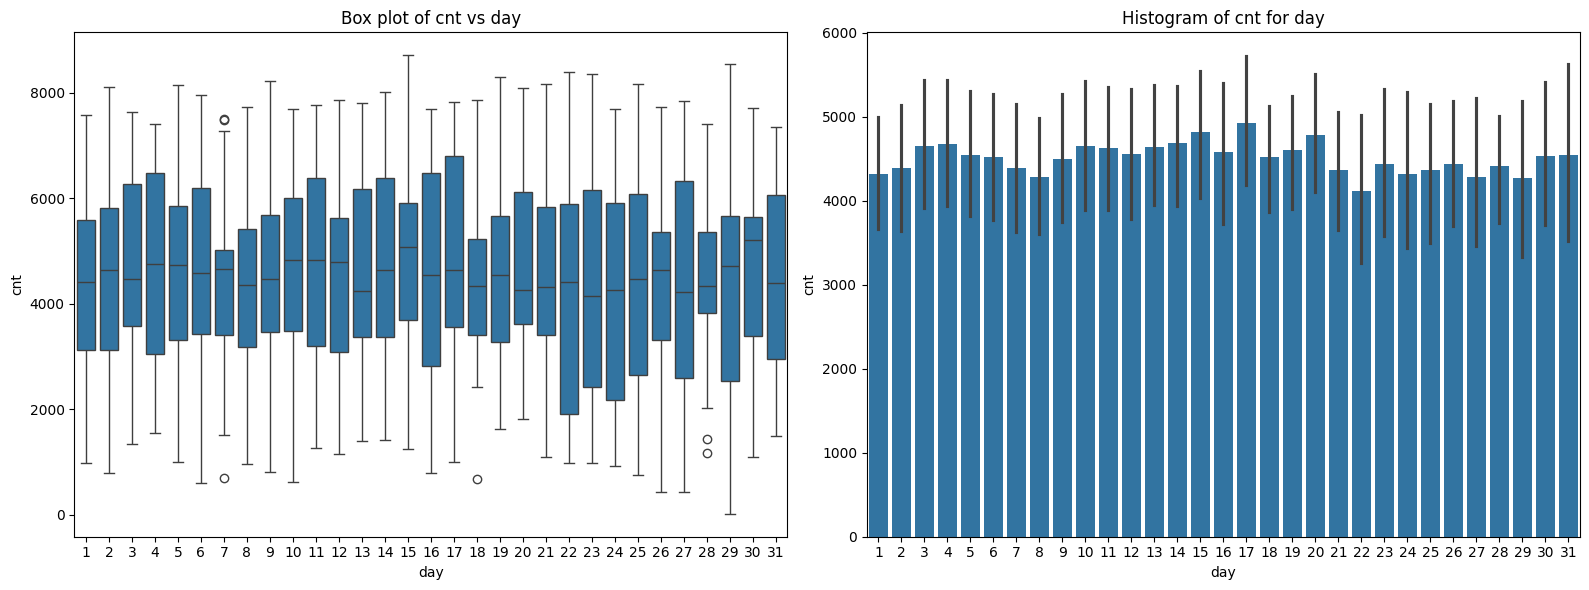

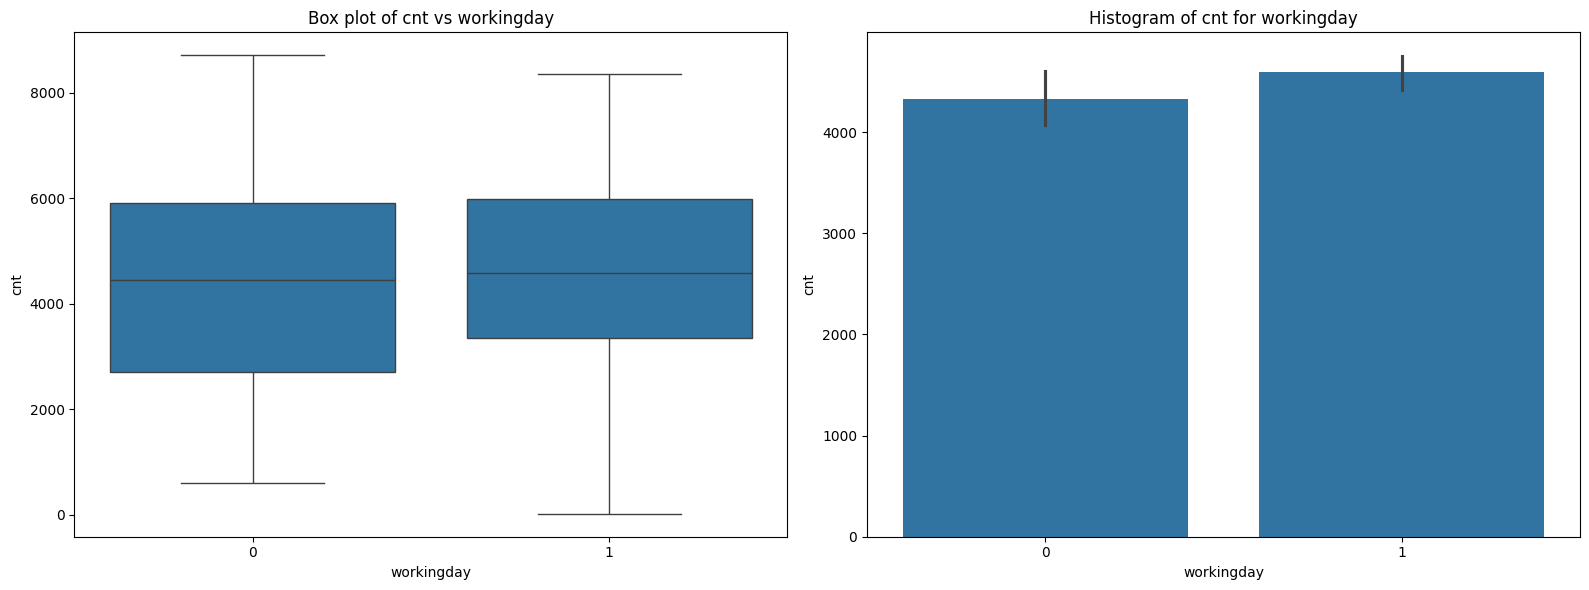

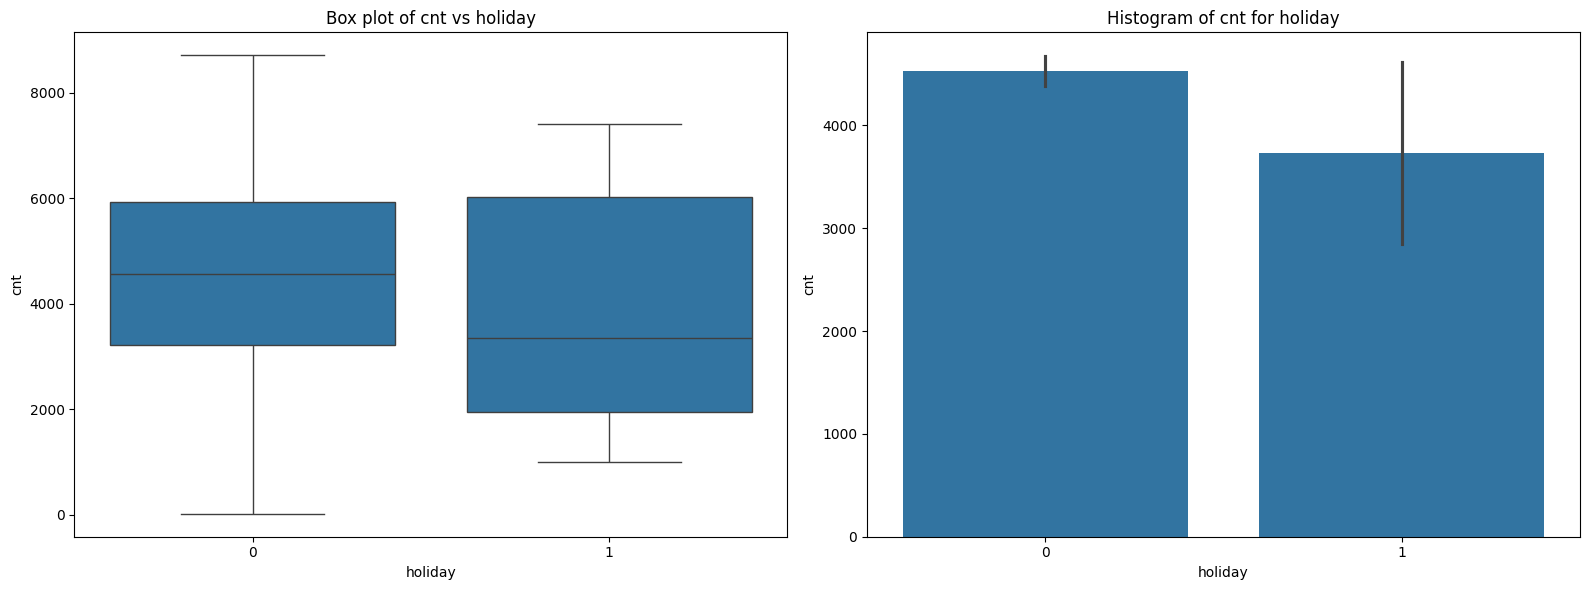

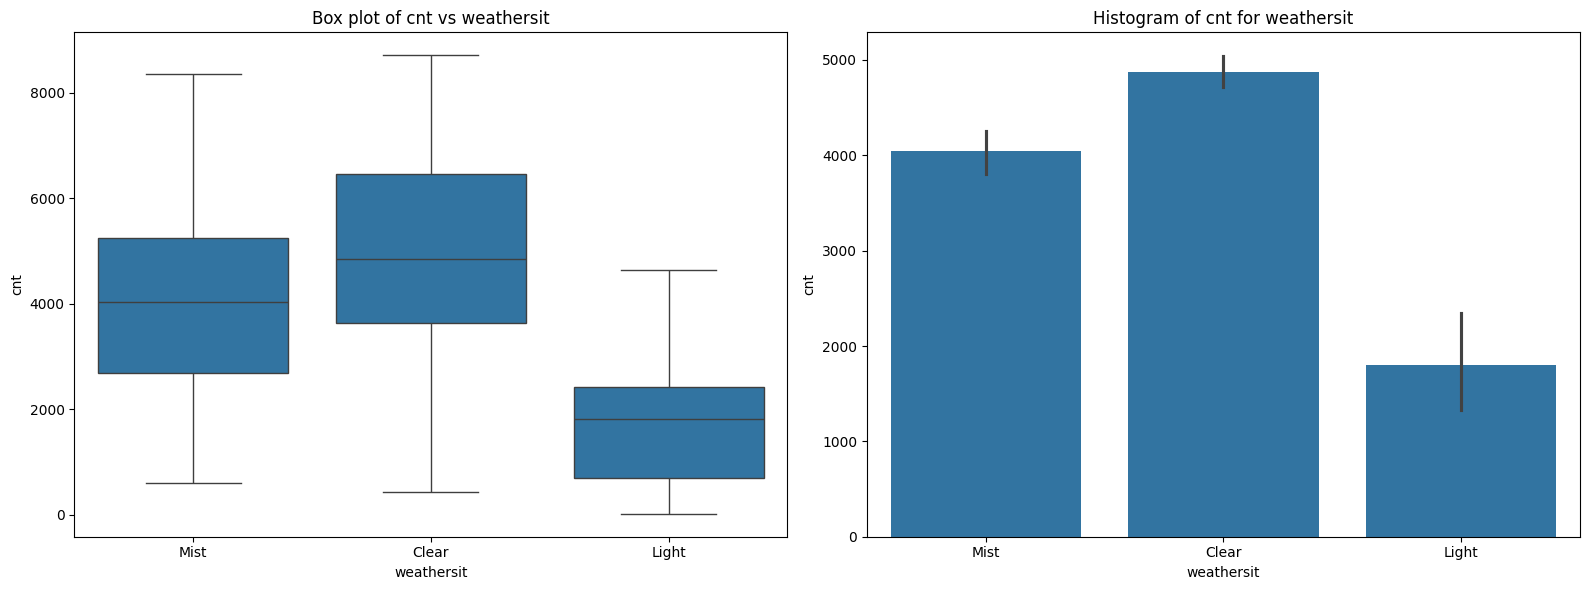

In [46]:
# Creating a Box plot for categorical dataType columns like mnth ,yr,season ,weekday

categorical_columns = ['month', 'year', 'season', 'weekday','day','workingday','holiday','weathersit']
for column in categorical_columns:
    # Create a new figure for each column
    plt.figure(figsize=(16, 6))  # Adjust figure size to fit both plots side-by-side

    # Boxplot on the left
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(x=column, y='cnt', data=df)
    plt.title(f'Box plot of cnt vs {column}')

    # Histogram on the right
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.barplot(x=column, y='cnt', data=df, estimator='mean')

    plt.title(f'Histogram of cnt for {column}')

    # Show the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

 * **Weather Situation:**  The 'weathersit' variable has a noticeable impact on bike rentals.  Clear or partly cloudy weather (weather situation clear) shows the highest median and overall distribution of bike rentals.



 * **Season:** Seasons Summer and fall  show moderate effects on bike rentals, suggesting higher rental counts compared to other seasons.  The box plots likely show differences in the distribution of rentals across seasons, with some seasons exhibiting higher median rental counts and potentially less variability.
 * **Month (mnth):** The month of the year influences rentals.  There's likely a seasonal trend with lower rentals in winter months and higher rentals in warmer months, especially during summer (June-August).
 * **year**
 Counts (cnt) have increased in year=1 compared to year=0. This could indicate growth in the phenomenon being measured (e.g., increased bike rentals, sales, or similar) over time.



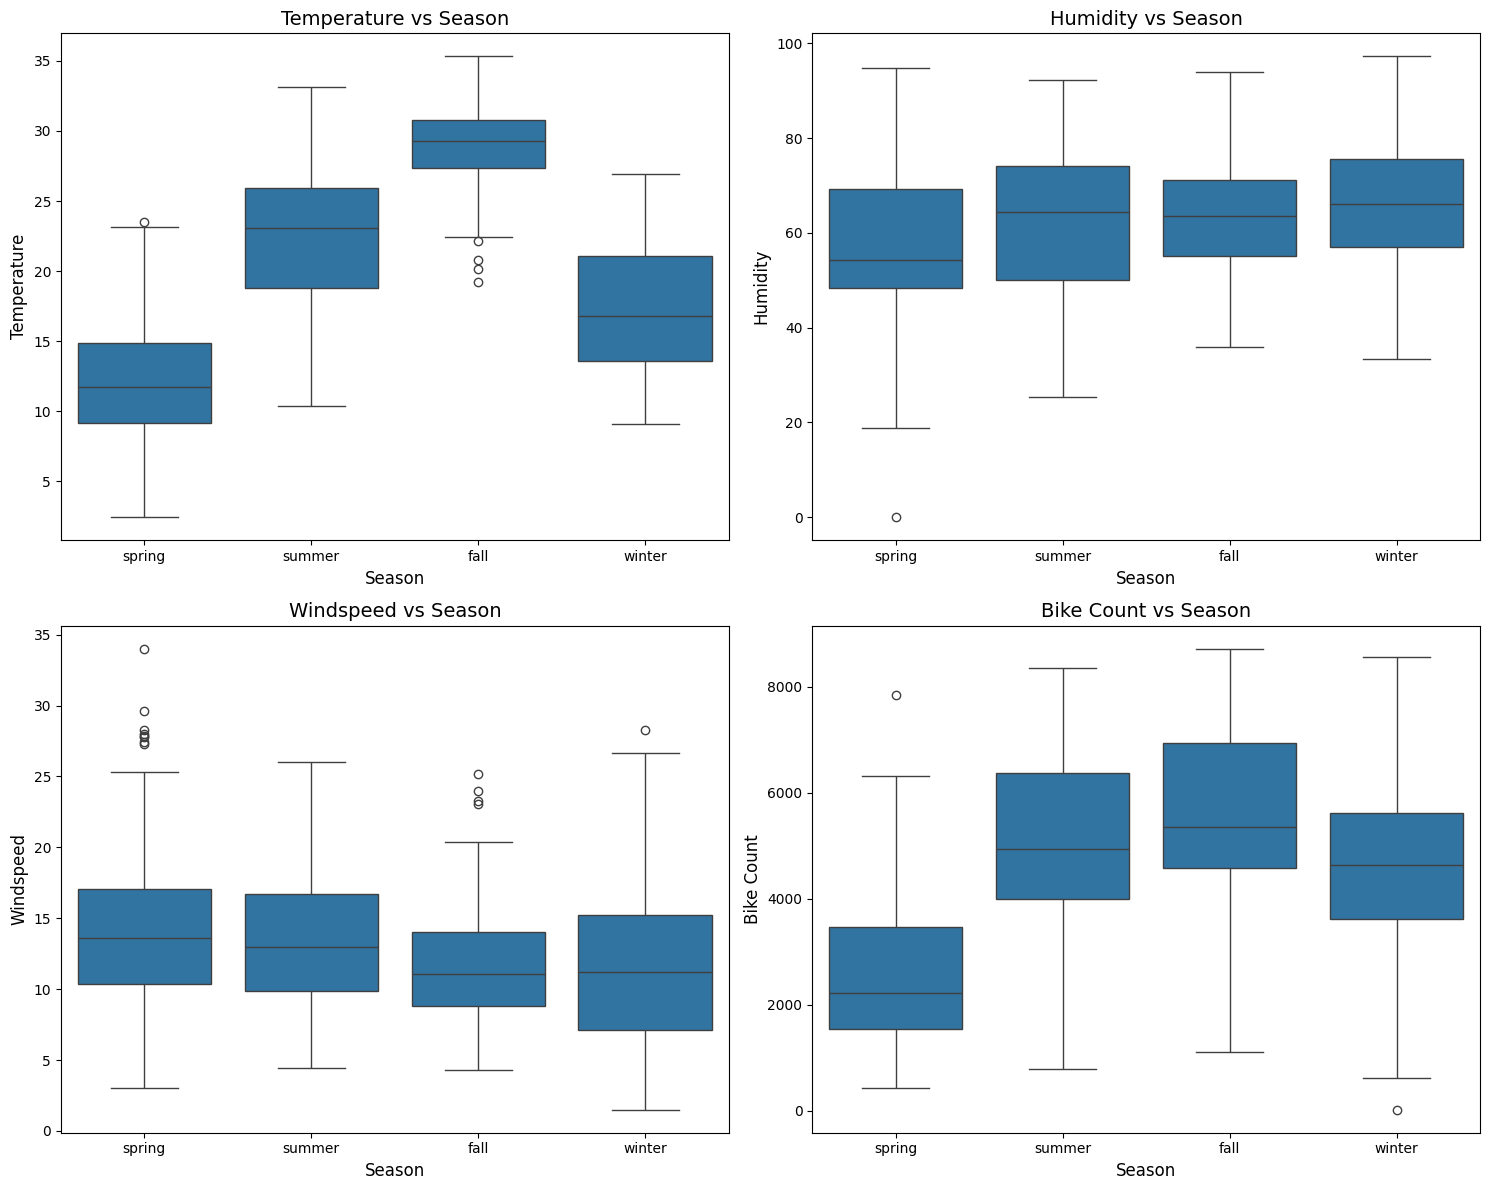

In [15]:

#  a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# First plot: Temperature vs Season
sns.boxplot(x='season', y='temp', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Temperature vs Season', fontsize=14)
axes[0, 0].set_xlabel('Season', fontsize=12)
axes[0, 0].set_ylabel('Temperature', fontsize=12)

# Second plot: Humidity vs Season
sns.boxplot(x='season', y='humidity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Humidity vs Season', fontsize=14)
axes[0, 1].set_xlabel('Season', fontsize=12)
axes[0, 1].set_ylabel('Humidity', fontsize=12)

# Third plot: Windspeed vs Season
sns.boxplot(x='season', y='windspeed', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Windspeed vs Season', fontsize=14)
axes[1, 0].set_xlabel('Season', fontsize=12)
axes[1, 0].set_ylabel('Windspeed', fontsize=12)

# Fourth plot: Bike Count vs Season
sns.boxplot(x='season', y='cnt', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Bike Count vs Season', fontsize=14)
axes[1, 1].set_xlabel('Season', fontsize=12)
axes[1, 1].set_ylabel('Bike Count', fontsize=12)

plt.tight_layout()

plt.show()



The temperatures show significant variation across all seasons.
- The median temperature seems to be the highest in fall and summer, followed by spring, and winter.
- The interquartile range appears to be wider in summer and spring, suggesting more variability in temperature during these seasons.

### Multivariate graph for total df bases on season and Weather Situation


In [16]:

fig = px.scatter_matrix(df, dimensions=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
                        color='season',
                       title='Multivariate Analysis of Bike Sharing Data by season',
                       labels={'cnt': 'Bike Rentals'}) # Color points by season
fig.show()



Spring and Summer seem to have higher bike rental counts compared to Fall and Winter. This aligns with the intuition that people tend to bike more during warmer seasons.

In [17]:


# Multivariate graph for total df based on weathersit using Plotly
fig = px.scatter_matrix(df, dimensions=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
                       color='weathersit',
                       title='Multivariate Analysis of Bike Sharing Data by weathersit',
                       labels={'cnt': 'Bike Rentals'})

fig.update_traces(diagonal_visible=False)  # Hide the diagonal histograms

fig.show()

Weather Situation and Bike Rentals:

The plots suggest that bike rentals are generally higher on clear days compared to days with mist or light rain.
This is likely due to the fact that people are more likely to rent bikes when the weather is pleasant and dry.


There seems to be a negative correlation between humidity and bike rentals. This suggests that higher humidity levels might discourage people from renting bikes.


# Data Preprocessing (2)


In [18]:
# * Perform One-Hot Encoding for Categorical columns
# 'day' - not converting this to encoding as this is numerical continuos variable
df_sum = pd.get_dummies(
    df,
    columns = ['month','weekday','season'],drop_first=True)
df_sum = pd.get_dummies(
    df_sum,
    columns = ['weathersit']) # not dropping weather Situation since we have a strong correlation for clear weather
df_sum =df_sum.astype(int)
df_sum.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day,month_aug,...,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light,weathersit_Mist
0,0,0,0,14,18,80,10,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14,17,69,16,801,2,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,8,9,43,16,1349,3,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8,10,59,10,1562,4,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,9,11,43,12,1600,5,0,...,0,0,0,1,1,0,0,1,0,0


In [19]:
df_sum.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'day', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_july', 'month_june', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

#  Build a linear Regression model from the above Preprocessed data.

In [20]:

# Define features (X) and target variable (y)
X = df_sum.drop('cnt', axis=1)
y = df_sum['cnt']
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets

X_train, X_test = train_test_split(df_sum, train_size = 0.7, random_state = 42)

# using Scaling since the Independant varaibles are of scales below 100 and the target variables is in 1000's
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
num_vars = ['temp','atemp','humidity','windspeed','day','cnt']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Transform the testing data using the same scaler
X_test[num_vars] = scaler.transform(X_test[num_vars])
y_train = X_train.pop('cnt')
y_test = X_test.pop('cnt')



In [21]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,day,month_aug,month_dec,...,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.547356,0.526194,0.649606,0.411111,0.479739,0.074510,0.074510,...,0.152941,0.145098,0.131373,0.141176,0.231373,0.258824,0.24902,0.625490,0.029412,0.345098
std,0.500106,0.163554,0.471169,0.226377,0.208213,0.143779,0.183980,0.292471,0.262857,0.262857,...,0.360284,0.352545,0.338139,0.348545,0.422124,0.438419,0.43287,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.536082,0.296296,0.233333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575758,0.564103,0.659794,0.370370,0.466667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.518519,0.733333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [22]:
X_train.columns # total 18 cols
# Assuming we need atleast few important 10 columns for building Models

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'day', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Clear',
       'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

## Building the model using top to bottom approach
The order is chosen to:

- Ensure relevance first (p-values): Remove predictors that don’t contribute significantly.
- Ensure stability next (VIF): Remove predictors that cause multicollinearity, ensuring stable and interpretable coefficients.

In [23]:
# Function to calculate VIF
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# Fit the regression model
def fit_model(data, features,y_train):
    X = sm.add_constant(data[features])  # Add intercept
    model = sm.OLS(y_train, X).fit()
    return model

In [24]:
# Initial features
features = list(X_train.columns)

# creating an Iterative process for feature selection based on P values and VIF
while True:
    # Step 1: Fit the model and check p-values
    model = fit_model(X_train, features,y_train)
    p_values = model.pvalues.iloc[1:]  # Exclude intercept
    print("\nP-values:\n", p_values)

    # Step 2: Remove features with high p-values
    high_p = p_values[p_values >= 0.05]
    if not high_p.empty:
        feature_to_remove = high_p.sort_values(ascending=False).index[0]
        print(f"\nRemoving '{feature_to_remove}' due to high p-value...")
        features.remove(feature_to_remove)
        continue

    # Step 3: Calculate VIF
    vif = calculate_vif(X_train, features)
    print("VIF:\n", vif)

    # Step 4: Remove features with high VIF
    high_vif = vif[vif['VIF'] > 10]
    if not high_vif.empty:
        feature_to_remove = high_vif.sort_values('VIF', ascending=False)['Feature'].iloc[0]
        print(f"\nRemoving '{feature_to_remove}' due to high VIF...")
        features.remove(feature_to_remove)
        continue
    # If no features to remove, stop
    break

# Final Model
print("\nFinal Model Summary:")
print(model.summary())



P-values:
 year                1.036898e-100
holiday              7.467565e-01
workingday           5.434403e-07
temp                 6.418578e-01
atemp                1.062768e-01
humidity             1.609946e-04
windspeed            4.243339e-05
day                  2.208249e-01
month_aug            9.072655e-01
month_dec            2.966490e-01
month_feb            6.873676e-01
month_jan            9.885177e-01
month_july           2.993233e-01
month_june           7.765625e-01
month_mar            4.641317e-02
month_may            9.829944e-02
month_nov            1.580031e-01
month_oct            3.187909e-01
month_sep            2.069265e-02
weekday_mon          2.043686e-01
weekday_sat          1.351953e-05
weekday_sun          3.606823e-01
weekday_thu          6.616930e-01
weekday_tue          1.004105e-01
weekday_wed          5.550224e-01
season_spring        7.198982e-06
season_summer        7.580600e-01
season_winter        6.235924e-03
weathersit_Clear     7.663789e-26
we

#### Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?


In [25]:
features = list(X_train.columns)
len(features)

31

In [26]:
# Build model with all 31 festures and use 16 from RFE and Manually Eliminate features which are not relevant


# Select the top 16 features from RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=16)
rfe_selector = rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_features = list(X_train.columns[rfe_support])
model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.21e-185
Time:                        15:46:47   Log-Likelihood:                 480.42
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     495   BIC:                            -867.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1321      0.026  

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero e

Model 1

In [27]:
rfe_features.remove('holiday') # Removing Holiday as its having high P value and high VIF (its highly correlated with workingday)
model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.21e-185
Time:                        15:46:47   Log-Likelihood:                 480.42
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     495   BIC:                            -867.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1189      0.037  

Model 2

In [28]:
rfe_features.remove('weekday_sun') # Removing Sunday as its having high P value
model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.18e-185
Time:                        15:46:47   Log-Likelihood:                 479.40
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     496   BIC:                            -871.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1442      0.032  

Model 3

In [29]:
rfe_features.remove('weathersit_Clear') # Removing weathersit_Clear as its having high P value
model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.18e-185
Time:                        15:46:48   Log-Likelihood:                 479.40
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     496   BIC:                            -871.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2866      0.038  

Model 4

In [30]:
rfe_features.remove('humidity') # Removing humidity as its having high VIF value
model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          8.12e-184
Time:                        15:46:48   Log-Likelihood:                 472.25
No. Observations:                 510   AIC:                            -918.5
Df Residuals:                     497   BIC:                            -863.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1994      0.031  

Model 5

In [31]:
# Removing temperature due to its high VIF value and the fact that it is a natural factor beyond business control, making it reasonable to exclude from the model.
rfe_features.remove('atemp')

model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          7.37e-158
Time:                        15:46:48   Log-Likelihood:                 407.97
No. Observations:                 510   AIC:                            -791.9
Df Residuals:                     498   BIC:                            -741.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5083      0.019  

By removing temp  we see all the r2 has been dropped and also F-stat
so we shall keep this as is.

Final model

In [32]:
rfe_features.append('atemp')

model = fit_model(X_train, rfe_features,y_train)
print(model.summary())
print(calculate_vif(X_train, rfe_features))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          8.12e-184
Time:                        15:46:48   Log-Likelihood:                 472.25
No. Observations:                 510   AIC:                            -918.5
Df Residuals:                     497   BIC:                            -863.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1994      0.031  

In [33]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

p_values = model.pvalues[1:]  # Exclude the intercept
coefficients = model.params[1:]  # Exclude the intercept

# Create a DataFrame to store the results
feature_importance = pd.DataFrame({'Feature': p_values.index, 'P-value': p_values.values, 'Coefficient': coefficients.values})

# Sort the DataFrame by the absolute value of the coefficients in descending order
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

# Print the top 3 features
print("Top 3 features contributing significantly to the demand of shared bikes:")
print(feature_importance.head(3))

Top 3 features contributing significantly to the demand of shared bikes:
             Feature        P-value  Coefficient
11             atemp   4.696673e-29     0.454124
9   weathersit_Light   2.366711e-22    -0.269247
0               year  9.250439e-105     0.243294




### **Model Summary Interpretation**

1. **Key Metrics**:
   - **Df Model**: Indicates 12 features (excluding intercept) are used in the model.
   - **Covariance Type: nonrobust**: No special adjustments made for standard errors.

2. **Coefficients and Their Meaning**:
   - **const (Intercept)**: The baseline value of the dependent variable (`cnt`) when all independent variables are at their reference levels or 0.
   - **year (positive coefficient)**: Indicates that the target variable (`cnt`) increases over years. Each year adds approximately **0.2421 units** to the dependent variable.
   - **atemp (positive)**: The apparent temperature has a strong positive relationship with the dependent variable (`cnt`), meaning higher temperatures tend to result in higher counts.
   - **weathersit_Light (negative)**: weathersit_Light  has a negative impact on the dependent variable, meaning higher the Light Snow, Light Rain weather tend to reduce the target (`cnt`).

3. **Categorical Variables (Encoded as Dummies)**:
   - **month_dec, month_july, month_nov**: These months have a significant impact on the dependent variable, with negative coefficients suggesting fewer counts in those months compared to the reference month (probably January).
   - **weekday_sat**: Saturdays tend to have more counts, as indicated by the positive coefficient.
   - **season_spring, season_winter**: Spring has fewer counts compared to the reference season (likely summer), while winter has a positive impact.
   - **weathersit_Light and Mist**: Light rain or misty weather negatively affects the dependent variable, reducing counts significantly.


5. **Implication**:
   - Features like temperature (`atemp`), year, and weather conditions (e.g., `weathersit`) strongly influence the dependent variable.
   - The model is well-fitted, with all variables contributing significantly.



### **Key Takeaways**
- The model explains the impact of each feature (statistically significant predictors) on bike count.
- Features with positive coefficients (e.g., `year`, `atemp`, `weekday_sat`) increase the target variable, while negative coefficients (e.g., `season_spring`, `weathersit_Light`) decrease it.




## Residual analysis
1. Linearity
2. Independence of errors
3. Homoscedasticity
4. normality distribution

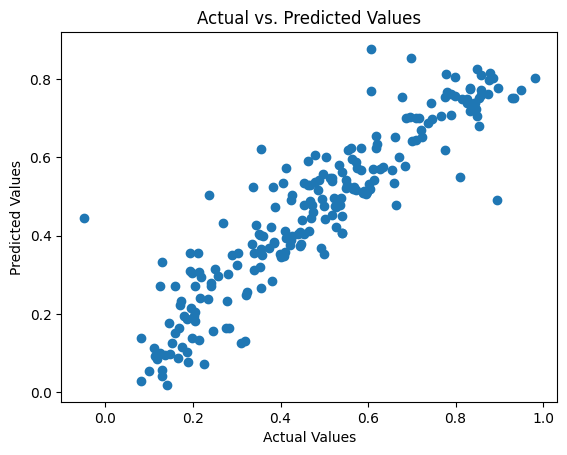

In [34]:

features = rfe_features
y_pred = model.predict(sm.add_constant(X_test[features]))
# 1. Linearity: Check the relationship between independent and dependent variables.
#   Doing this by plotting the predicted values against the actual values.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()




There is a Linearity between the dependent and independent variables  

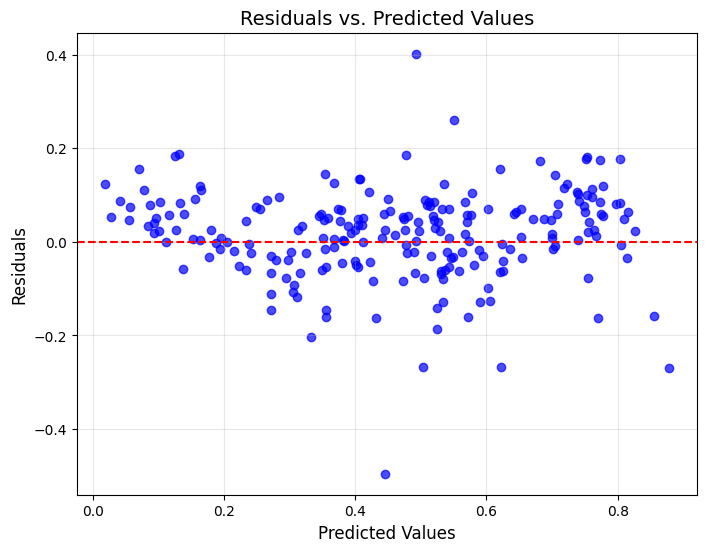

In [35]:
# 2. Independence of errors: Check for autocorrelation in the residuals.
# 3. Homoscedasticity: Check for constant variance in the residuals.
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs. Predicted Values', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


:There is no Collinearity between the error terms and  no constant variances is observed and No visible pattern observed from above plot for residuals.



Normality checks

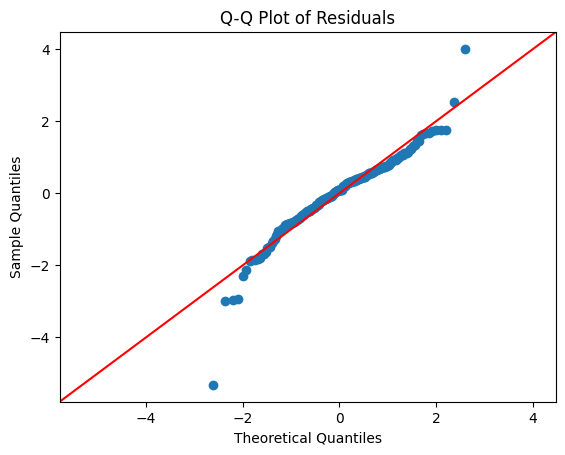

In [36]:
# Step 1: Create Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.show()

The residuals seem to follow a normal distribution, which is a key assumption for conducting hypothesis testing and making inferences in linear regression

### Model Evaluation

In [37]:

# Predict on the test set
features = rfe_features
y_pred = model.predict(sm.add_constant(X_test[features]))

# Calculate R-squared and adjusted R-squared for the test set
r2_test = r2_score(y_test, y_pred)
n_test = len(X_test)
p_test = len(features)  # Number of predictors
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)


# Predict on the training set
y_train_pred = model.predict(sm.add_constant(X_train[features]))

# Calculate R-squared and adjusted R-squared for the training set
r2_train = r2_score(y_train, y_train_pred)
n_train = len(X_train)
p_train = len(features)  # Number of predictors
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

print(f"Train R-squared: {r2_train:.4f}")
print(f"Train Adjusted R-squared: {adjusted_r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test:.4f}")

Train R-squared: 0.8322
Train Adjusted R-squared: 0.8281
Test R-squared: 0.8238
Test Adjusted R-squared: 0.8136
